In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab as pl
import tensorflow.contrib.learn as skflow
import string

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
%matplotlib inline

path = "UNSW-NB15_1.csv"
# This file is a CSV, just no CSV extension or headers
df = pd.read_csv(path, header=None)
print(df[0:3])

print("Read {} rows.".format(len(df)))
# df = df.sample(frac=0.1, replace=False) # Uncomment this line to sample only 10% of the dataset
df.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)

# The CSV file has no column heads, so add them
df.columns = [
    'srcip',
    'sport',
    'dstip',
    'dsport',
    'proto',
    'state',
    'dur',
    'sbyte',
    'dbytes',
    'sttl',
    'dttl',
    'sloss',
    'dloss',
    'service',
    'Sload',
    'Dload',
    'Spkts',
    'Dpkts',
    'swin',
    'dwin',
    'stcpb',
    'dtcpb',
    'smeansz',
    'dmeansz',
    'trans',
    'res',
    'Sjit',
    'Djit',
    'Stime', #QUITAR
    'Ltime', #QUITAR
    'Sintpkt',
    'Dintpkt',
    'tcprtt',
    'synack',
    'ackdat',
    'is_sm_ips_ports',
    'ct_state_ttl',
    'ct_flw_http_mthd',
    'is_ftp_login',
    'ct_ftp_cmd',
    'ct_srv_src',
    'ct_srv_dst',
    'ct_dst_ltm',
    'ct_src_ltm', 
    'ct_src_dport_ltm',
    'ct_dst_sport_lt', 
    'ct_dst_src_ltm',
    'attack_cat',
    'Label'
]

df.drop('sport', 1, inplace=True)#
df.drop('dsport', 1, inplace=True)#
df.drop('state', 1, inplace=True)#
df.drop('dur', 1, inplace=True)#
df.drop('Sload', 1, inplace=True)#
df.drop('Dload', 1, inplace=True)#
df.drop('Stime', 1, inplace=True)#
df.drop('Ltime', 1, inplace=True)#
df.drop('ct_src_ltm', 1, inplace=True)#

Using TensorFlow backend.
/miniconda3/envs/tf_jupyter/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


           0      1              2     3    4    5         6    7    8   9   \
0  59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055  132  164  31   
1  59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528  304  31   
2  59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146  178  31   

   ...  39  40  41 42  43  44  45  46   47  48  
0  ...   0   3   7  1   3   1   1   1  NaN   0  
1  ...   0   2   4  2   3   1   1   2  NaN   0  
2  ...   0  12   8  1   2   2   1   1  NaN   0  

[3 rows x 49 columns]
Read 700001 rows.


ValueError: Length mismatch: Expected axis has 48 elements, new values have 49 elements

In [2]:
import pandas as pd
import io
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab as pl
import tensorflow.contrib.learn as skflow
import string

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
%matplotlib inline

path = "UNSW-NB15_1.csv"
# This file is a CSV, just no CSV extension or headers
df = pd.read_csv(path, header=None)
print(df[0:3])

print("Read {} rows.".format(len(df)))
# df = df.sample(frac=0.1, replace=False) # Uncomment this line to sample only 10% of the dataset
#df.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)

# The CSV file has no column heads, so add them
df.columns = [
    'srcip',
    'sport',
    'dstip',
    'dsport',
    'proto',
    'state',
    'dur',
    'sbyte',
    'dbytes',
    'sttl',
    'dttl',
    'sloss',
    'dloss',
    'service',
    'Sload',
    'Dload',
    'Spkts',
    'Dpkts',
    'swin',
    'dwin',
    'stcpb',
    'dtcpb',
    'smeansz',
    'dmeansz',
    'trans',
    'res',
    'Sjit',
    'Djit',
    'Stime', #QUITAR
    'Ltime', #QUITAR
    'Sintpkt',
    'Dintpkt',
    'tcprtt',
    'synack',
    'ackdat',
    'is_sm_ips_ports',
    'ct_state_ttl',
    'ct_flw_http_mthd',
    'is_ftp_login',
    'ct_ftp_cmd',
    'ct_srv_src',
    'ct_srv_dst',
    'ct_dst_ltm',
    'ct_src_ltm', 
    'ct_src_dport_ltm',
    'ct_dst_sport_lt', 
    'ct_dst_src_ltm',
    'attack_cat',
    'Label'
]

           0      1              2     3    4    5         6    7    8   9   \
0  59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055  132  164  31   
1  59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528  304  31   
2  59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146  178  31   

   ...  39  40  41 42  43  44  45  46   47  48  
0  ...   0   3   7  1   3   1   1   1  NaN   0  
1  ...   0   2   4  2   3   1   1   2  NaN   0  
2  ...   0  12   8  1   2   2   1   1  NaN   0  

[3 rows x 49 columns]
Read 700001 rows.


In [3]:
print(df[0:3])

        srcip  sport          dstip dsport proto state       dur  sbyte  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055    132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133    528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119    146   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     164    31  ...           0           3           7          1   
1     304    31  ...           0           2           4          2   
2     178    31  ...           0          12           8          1   

   ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_lt  ct_dst_src_ltm  attack_cat  \
0           3                 1                1               1         NaN   
1           3                 1                1               2         NaN   
2           2                 2                1               1         NaN   

   Label  
0      0  
1      0  
2      0  

[3 rows x 49 columns]


In [4]:
df.drop('sport', 1, inplace=True)#
df.drop('dsport', 1, inplace=True)#
df.drop('state', 1, inplace=True)#
df.drop('dur', 1, inplace=True)#
df.drop('Sload', 1, inplace=True)#
df.drop('Dload', 1, inplace=True)#
df.drop('Stime', 1, inplace=True)#
df.drop('Ltime', 1, inplace=True)#
df.drop('ct_src_ltm', 1, inplace=True)#

In [10]:
ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(filename):
    print()
    print("Analyzing: {}".format(filename))
    df = pd.read_csv(filename,encoding=ENCODING)
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

#analyze(path)


# display 5 rows
df[0:5]

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

#Clean 'date' column and convert to Int type
def clean_date(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    s_removed = s.replace(" ", "")
    s_int = int(s_removed)
    return s_int

########## CLEAN IP #######################
def clean_ip(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    s_int = int(s)
    return s_int

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

#MINMAX -1 1
# Encode a column to a range between normalized_low and normalized_high.
def min_max_1(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
        * (normalized_high - normalized_low) + normalized_low

#MINMAX 0 1
def min_max_0(df, name, normalized_low=0, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
        * (normalized_high - normalized_low) + normalized_low

    
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    # Regression
    return df[result].values.astype(np.float32), df[[target]].values.astype(np.float32)

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




#df['srcip'] = df['srcip'].apply(clean_ip)
#df['dstip'] = df['dstip'].apply(clean_ip)

# Now encode the feature vector

encode_numeric_zscore(df, 'srcip')
#encode_numeric_zscore((df, 'sport')

encode_numeric_zscore(df, 'dstip') 
#encode_numeric_zscore(df, 'dsport') #must be str not int ???

encode_text_dummy(df, 'proto') 
#encode_text_dummy(df, 'state')

#encode_numeric_zscore(df, 'dur')

encode_numeric_zscore(df, 'sbyte') 
encode_numeric_zscore(df, 'dbytes')
encode_numeric_zscore(df, 'sttl')
encode_numeric_zscore(df, 'dttl')
encode_numeric_zscore(df, 'sloss')
encode_numeric_zscore(df, 'dloss')
encode_text_dummy(df, 'service') 
#encode_numeric_zscore(df, 'Sload')

#encode_numeric_zscore(df, 'Dload')

encode_numeric_zscore(df, 'Spkts')#
encode_numeric_zscore(df, 'Dpkts')#
encode_numeric_zscore(df, 'swin')#
encode_numeric_zscore(df, 'dwin')#
encode_numeric_zscore(df, 'stcpb')#
encode_numeric_zscore(df, 'dtcpb')#
encode_numeric_zscore(df, 'smeansz')#
encode_numeric_zscore(df, 'dmeansz')#
encode_numeric_zscore(df, 'trans')#
encode_numeric_zscore(df, 'res')#
encode_numeric_zscore(df, 'Sjit')#
encode_numeric_zscore(df, 'Djit')#

encode_numeric_zscore(df, 'Sintpkt')#
encode_numeric_zscore(df, 'Dintpkt')#
encode_numeric_zscore(df, 'tcprtt')#
encode_numeric_zscore(df, 'synack')#
encode_numeric_zscore(df, 'ackdat')#
#encode_numeric_zscore(df, 'is_sm_ips_ports')#
encode_numeric_zscore(df, 'ct_state_ttl')#
encode_numeric_zscore(df, 'ct_flw_http_mthd')#
#encode_numeric_zscore(df, 'is_ftp_login')#
encode_numeric_zscore(df, 'ct_ftp_cmd')#
encode_numeric_zscore(df, 'ct_srv_src')#
encode_numeric_zscore(df, 'ct_srv_dst')#
encode_numeric_zscore(df, 'ct_dst_ltm')#
#encode_numeric_zscore(df, 'ct_src_ltm')

encode_numeric_zscore(df, 'ct_src_dport_ltm')#
encode_numeric_zscore(df, 'ct_dst_sport_lt')#
encode_numeric_zscore(df, 'ct_dst_src_ltm')#
encode_text_dummy(df, 'attack_cat')#


outcomes = encode_text_index(df, 'Label')#
num_classes = len(outcomes)

KeyError: 'proto'

In [11]:
encode_text_dummy(df, 'attack_cat')

In [12]:
print(df['attack_cat'])

KeyError: 'attack_cat'

In [13]:
import pandas as pd
import io
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab as pl
import tensorflow.contrib.learn as skflow
import string

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
%matplotlib inline

path = "UNSW-NB15_1.csv"
# This file is a CSV, just no CSV extension or headers
df = pd.read_csv(path, header=None)
print(df[0:3])

print("Read {} rows.".format(len(df)))
# df = df.sample(frac=0.1, replace=False) # Uncomment this line to sample only 10% of the dataset
#df.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)

# The CSV file has no column heads, so add them
df.columns = [
    'srcip',
    'sport',
    'dstip',
    'dsport',
    'proto',
    'state',
    'dur',
    'sbyte',
    'dbytes',
    'sttl',
    'dttl',
    'sloss',
    'dloss',
    'service',
    'Sload',
    'Dload',
    'Spkts',
    'Dpkts',
    'swin',
    'dwin',
    'stcpb',
    'dtcpb',
    'smeansz',
    'dmeansz',
    'trans',
    'res',
    'Sjit',
    'Djit',
    'Stime', #QUITAR
    'Ltime', #QUITAR
    'Sintpkt',
    'Dintpkt',
    'tcprtt',
    'synack',
    'ackdat',
    'is_sm_ips_ports',
    'ct_state_ttl',
    'ct_flw_http_mthd',
    'is_ftp_login',
    'ct_ftp_cmd',
    'ct_srv_src',
    'ct_srv_dst',
    'ct_dst_ltm',
    'ct_src_ltm', 
    'ct_src_dport_ltm',
    'ct_dst_sport_lt', 
    'ct_dst_src_ltm',
    'attack_cat',
    'Label'
]

df.drop('sport', 1, inplace=True)#
df.drop('dsport', 1, inplace=True)#
df.drop('state', 1, inplace=True)#
df.drop('dur', 1, inplace=True)#
df.drop('Sload', 1, inplace=True)#
df.drop('Dload', 1, inplace=True)#
df.drop('Stime', 1, inplace=True)#
df.drop('Ltime', 1, inplace=True)#
df.drop('ct_src_ltm', 1, inplace=True)#

ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(filename):
    print()
    print("Analyzing: {}".format(filename))
    df = pd.read_csv(filename,encoding=ENCODING)
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

#analyze(path)


# display 5 rows
df[0:5]

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

#Clean 'date' column and convert to Int type
def clean_date(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    s_removed = s.replace(" ", "")
    s_int = int(s_removed)
    return s_int

########## CLEAN IP #######################
def clean_ip(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    s_int = int(s)
    return s_int

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

#MINMAX -1 1
# Encode a column to a range between normalized_low and normalized_high.
def min_max_1(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
        * (normalized_high - normalized_low) + normalized_low

#MINMAX 0 1
def min_max_0(df, name, normalized_low=0, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
        * (normalized_high - normalized_low) + normalized_low

    
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    # Regression
    return df[result].values.astype(np.float32), df[[target]].values.astype(np.float32)

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




df['srcip'] = df['srcip'].apply(clean_ip)
df['dstip'] = df['dstip'].apply(clean_ip)

# Now encode the feature vector

encode_numeric_zscore(df, 'srcip')#
#encode_numeric_zscore((df, 'sport')

encode_numeric_zscore(df, 'dstip') #
#encode_numeric_zscore(df, 'dsport') #must be str not int ???

encode_text_dummy(df, 'proto') #
#encode_text_dummy(df, 'state')

#encode_numeric_zscore(df, 'dur')

encode_numeric_zscore(df, 'sbyte') #
encode_numeric_zscore(df, 'dbytes')#
encode_numeric_zscore(df, 'sttl')#
encode_numeric_zscore(df, 'dttl')#
encode_numeric_zscore(df, 'sloss')#
encode_numeric_zscore(df, 'dloss')#
encode_text_dummy(df, 'service') #
#encode_numeric_zscore(df, 'Sload')

#encode_numeric_zscore(df, 'Dload')

encode_numeric_zscore(df, 'Spkts')#
encode_numeric_zscore(df, 'Dpkts')#
encode_numeric_zscore(df, 'swin')#
encode_numeric_zscore(df, 'dwin')#
encode_numeric_zscore(df, 'stcpb')#
encode_numeric_zscore(df, 'dtcpb')#
encode_numeric_zscore(df, 'smeansz')#
encode_numeric_zscore(df, 'dmeansz')#
encode_numeric_zscore(df, 'trans')#
encode_numeric_zscore(df, 'res')#
encode_numeric_zscore(df, 'Sjit')#
encode_numeric_zscore(df, 'Djit')#

encode_numeric_zscore(df, 'Sintpkt')#
encode_numeric_zscore(df, 'Dintpkt')#
encode_numeric_zscore(df, 'tcprtt')#
encode_numeric_zscore(df, 'synack')#
encode_numeric_zscore(df, 'ackdat')#
#encode_numeric_zscore(df, 'is_sm_ips_ports')#
encode_numeric_zscore(df, 'ct_state_ttl')#
encode_numeric_zscore(df, 'ct_flw_http_mthd')#
#encode_numeric_zscore(df, 'is_ftp_login')#
encode_numeric_zscore(df, 'ct_ftp_cmd')#
encode_numeric_zscore(df, 'ct_srv_src')#
encode_numeric_zscore(df, 'ct_srv_dst')#
encode_numeric_zscore(df, 'ct_dst_ltm')#
#encode_numeric_zscore(df, 'ct_src_ltm')

encode_numeric_zscore(df, 'ct_src_dport_ltm')#
encode_numeric_zscore(df, 'ct_dst_sport_lt')#
encode_numeric_zscore(df, 'ct_dst_src_ltm')#
#encode_numeric_zscore(df, 'attack_cat')#
encode_text_dummy(df, 'attack_cat')

outcomes = encode_text_index(df, 'Label')#
num_classes = len(outcomes)

/miniconda3/envs/tf_jupyter/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


           0      1              2     3    4    5         6    7    8   9   \
0  59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055  132  164  31   
1  59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528  304  31   
2  59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146  178  31   

   ...  39  40  41 42  43  44  45  46   47  48  
0  ...   0   3   7  1   3   1   1   1  NaN   0  
1  ...   0   2   4  2   3   1   1   2  NaN   0  
2  ...   0  12   8  1   2   2   1   1  NaN   0  

[3 rows x 49 columns]
Read 700001 rows.


In [14]:
print(df[0:3])

     srcip     dstip     sbyte    dbytes     sttl      dttl     sloss  \
0 -0.06167 -0.149427 -0.108637 -0.258887 -0.18786 -0.097889 -0.335726   
1 -0.06167 -0.149427 -0.099817 -0.258135 -0.18786 -0.097889 -0.335726   
2 -0.06167 -0.149427 -0.108325 -0.258812 -0.18786 -0.097889 -0.335726   

      dloss     Spkts     Dpkts  ...  service-ssl  attack_cat- Fuzzers  \
0 -0.329448 -0.495602 -0.383889  ...            0                    0   
1 -0.329448 -0.470664 -0.369494  ...            0                    0   
2 -0.329448 -0.495602 -0.383889  ...            0                    0   

   attack_cat-Analysis  attack_cat-Backdoors  attack_cat-DoS  \
0                    0                     0               0   
1                    0                     0               0   
2                    0                     0               0   

   attack_cat-Exploits  attack_cat-Generic  attack_cat-Reconnaissance  \
0                    0                   0                          0   
1      

Train on 525000 samples, validate on 175001 samples
Epoch 1/1000
 - 21s - loss: 0.0082 - acc: 0.9976 - val_loss: 0.0025 - val_acc: 0.9996
Epoch 2/1000
 - 21s - loss: 9.2335e-04 - acc: 0.9999 - val_loss: 3.2152e-04 - val_acc: 1.0000
Epoch 3/1000
 - 21s - loss: 7.4962e-04 - acc: 0.9999 - val_loss: 4.7876e-04 - val_acc: 0.9999
Epoch 4/1000
 - 21s - loss: 6.9629e-04 - acc: 0.9999 - val_loss: 6.1751e-05 - val_acc: 1.0000
Epoch 5/1000
 - 21s - loss: 2.1066e-04 - acc: 1.0000 - val_loss: 1.0264e-04 - val_acc: 1.0000
Epoch 6/1000
 - 21s - loss: 1.1012e-04 - acc: 1.0000 - val_loss: 3.3847e-05 - val_acc: 1.0000
Epoch 7/1000
 - 21s - loss: 4.8116e-04 - acc: 0.9999 - val_loss: 2.2171e-04 - val_acc: 1.0000
Epoch 8/1000
 - 21s - loss: 5.0306e-04 - acc: 1.0000 - val_loss: 6.4231e-05 - val_acc: 1.0000
Epoch 9/1000
 - 21s - loss: 7.9002e-05 - acc: 1.0000 - val_loss: 1.5491e-04 - val_acc: 1.0000
Epoch 00009: early stopping
Validation score: 0.9999885714938772
[0 1]


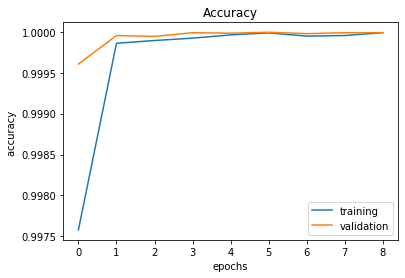

Confusion matrix, without normalization
[[169373      1]
 [     1   5626]]
Normalized confusion matrix
[[1.00e+00 5.90e-06]
 [1.78e-04 1.00e+00]]


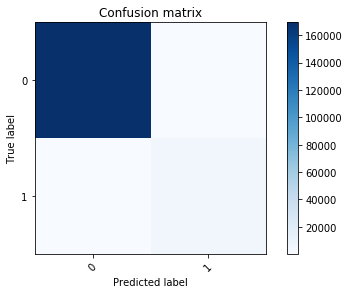

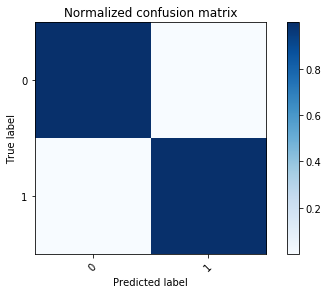

In [16]:
##################################################
# Break into X (predictors) & y (prediction)
x, y = to_xy(df,'Label')
#################################################



# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)


# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

print(outcomes)

### PLOT ACCURACY ####

plt.plot(np.arange(len(history.history['acc'])),
history.history['acc'], label='training')
plt.plot(np.arange(len(history.history['val_acc'])),
history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy ')
plt.legend(loc=0)
plt.show()

### PLOT CONFUSION MATRIX ###

# Not normalized
cm = confusion_matrix(y_eval, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, outcomes, title='Normalized confusion matrix')

plt.show()

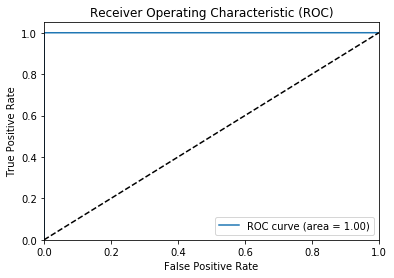

In [18]:
from sklearn.metrics import roc_curve, auc
#Plot an ROC. pred - the predictions, y - the expected outpus.
#En mi caso creo que es pred == pred y== y_eval
def plot_roc(pred, y):
	fpr, tpr, _ = roc_curve(y, pred)
	roc_auc = auc(fpr,tpr)

	plt.figure()
	plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
	plt.plot([0, 1], [0, 1], 'k--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title('Receiver Operating Characteristic (ROC)')
	plt.legend(loc="lower right")
	plt.show()

plot_roc(pred, y_eval)

In [19]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_eval, pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

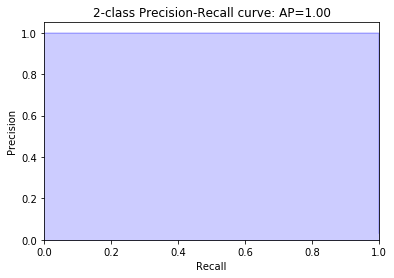

In [20]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_eval, pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))